# Các bước phân tích dữ liệu
## Tổng quan
- **Exploratory data analysis**: khám phá sơ bộ tập dữ liệu bằng những statistics và visualization methods từ đó nhận ra được những relationships của những features - potentially helpful cho việc áp dụng những prediction model dễ dàng hơn, chính xác hơn. 
- **Pre-processing data**: the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted. Tổng quan thì pre-processing là việc optimizing the quality/accuracy while minimizing information lost.
- **Modelling**: tùy vào bài toán classification/regression thì chúng ta sẽ áp dụng những model khác nhau. Nhưng mục đích chung thường gặp vẫn là dự đoán những features nào đó hoặc tìm hiểu underlined structure của dataset (clustering).
- **Results analysis**: dựa trên kết quả mà model cho được, chúng ta phân tích những kq này đã optimal với kiến thức hiện tại chúng ta biết hay chưa, so sánh giữa nhiều models khác nhau. Sau bước này chúng ta quay lại về **Pre-processing data** và **Modelling** nhằm thay đổi để cải thiện kết quả.


### Ví dụ
- Sau đây là ví dụ các bước cho 1 bài toán dự đoán giá nhà ở California (toy dataset)
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

- Import những libraries cần thiết:
    - numpy: library để thực hiện các phép toán với matrix, vector (linear algebra)
    - pandas: thực hiện những operations với dataframe (csv - tương tự excel file)
    - sklearn: library tích hợp nhiều Machine Learning techniques tại từng bước EDA, pre-processing, modelling, results analysis.
    - matplotlibt + seaborn: để plot cho đẹp :3

In [18]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston,fetch_california_housing

In [12]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

### Exploratory data analysis
- Bước đầu tiên chúng ta sẽ tính những statistic values của dataset:
    - Shape: kích thước dữ liệu (samples,features) nhằm nhận biết loại dataset (ít samples nhiều features chẳng hạn) và có 1 góc nhìn sơ bộ về dimensionality của tập dataset.
    - Distribution of features: chúng ta sẽ tính từng mean, median, variance, skewness của từng feature để xem những features nào cần normalize (chuẩn hóa) và có nhận biết về sự phân bố của từng feature.
    - Correlation: thông số này cho biết độ chặt chẽ trong mối quan hệ tuyến tính của từng cặp features ( equivalent với đồng biến, nghịch biến)
    - Data-type: numerical data, categorical data, time series data, and text
        - Numerical data: là những dữ liệu với số thực- continuous (height, weight measures) và discrete (number of people, units sold, etc)
        - Categorical data: loại dữ liệu thể hiện sự phân bố vào nhóm có các tính chất khác nhau (sex, ethnicity, jobs, etc..)
        - Time series: loại dữ liệu số thực với time-dependent (stock price, weather, etc...)
        - Text: là chữ...

In [14]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


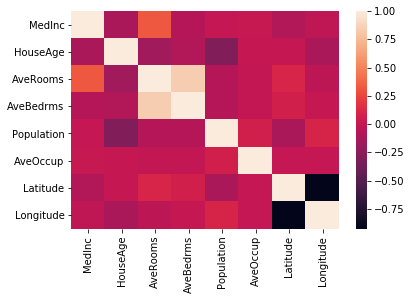

In [20]:
corr = X.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [21]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00
